In [1]:
import os
import matplotlib
from collections import Counter


os.chdir("/Users/lcn1/Desktop/Athese/code/RHM_Cagnetta/hierarchy-learning-master")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
SMALL_SIZE = 24

plt.rc('axes', titlesize=SMALL_SIZE, labelsize=SMALL_SIZE)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE + 5)  # fontsize of th

from analysis.load_and_plot import load_data, plot_all_train_losses, plot_all_test_errors, setup_colors, smoothen

## Get and prepare data

In [3]:
encoder_runs, eval_runs = load_data("/Volumes/lcncluster/delrocq/code/RHM_Cagnetta/logs/test_better")

In [4]:
encoder_runs["final_loss"] = encoder_runs.train_loss.apply(lambda x: np.mean(x[-10:]))

## Basic plotting

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Train loss'>)

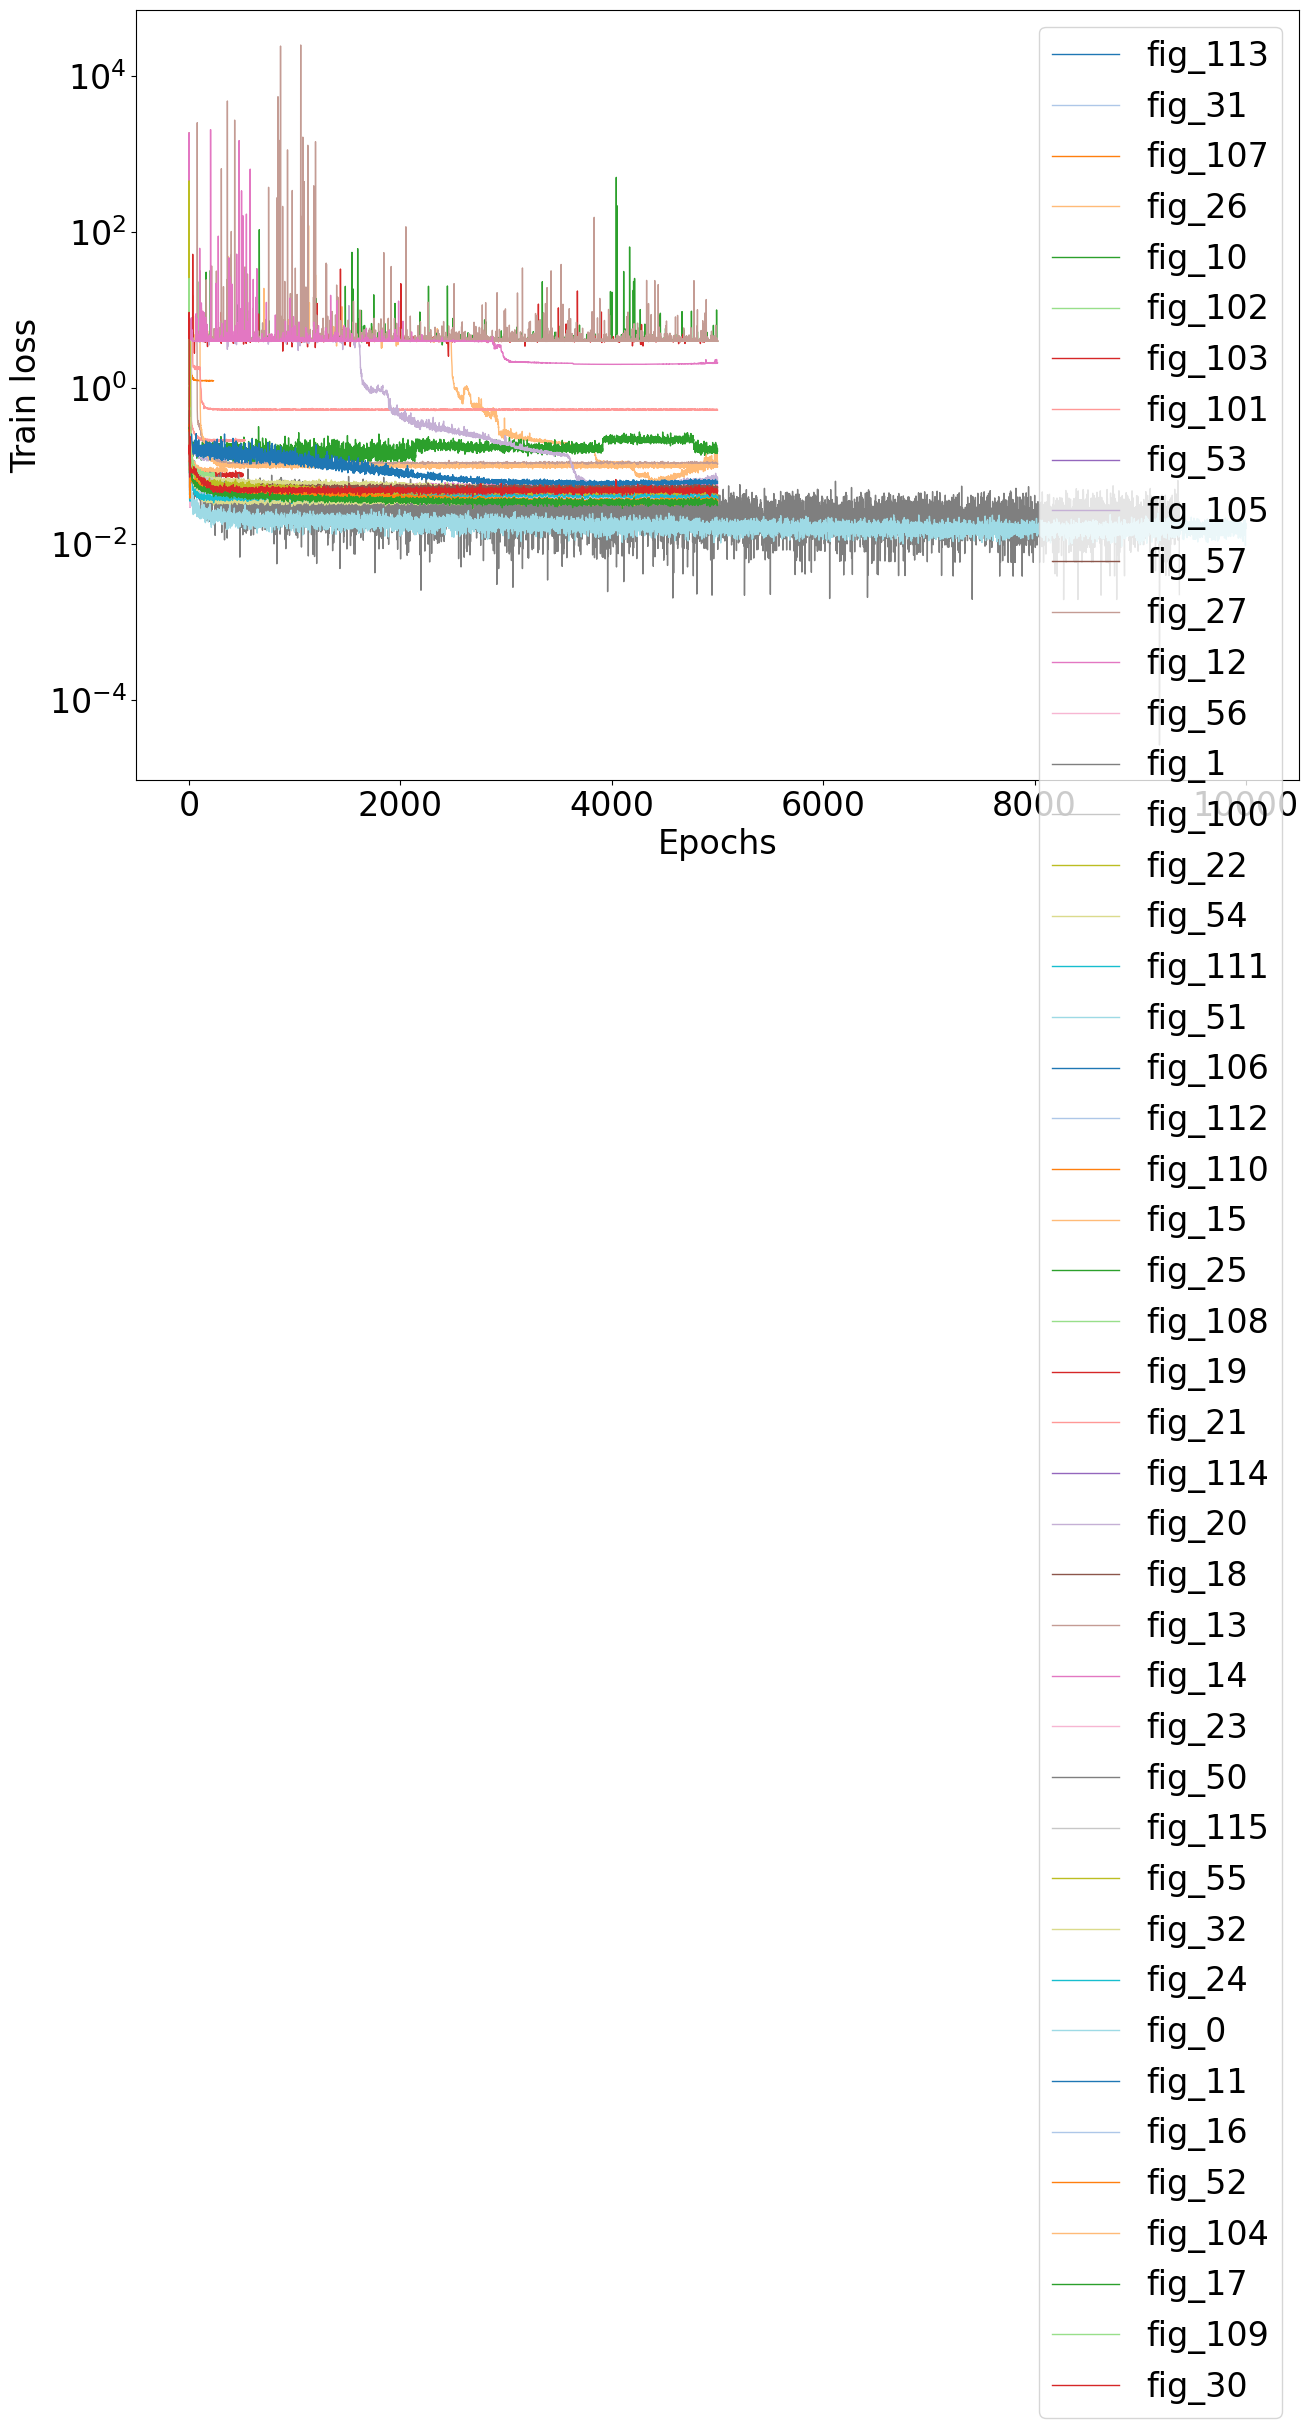

In [5]:
col_fun = setup_colors(encoder_runs)
plot_all_train_losses(encoder_runs, col_fun=col_fun, smooth=1)

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Train loss'>)

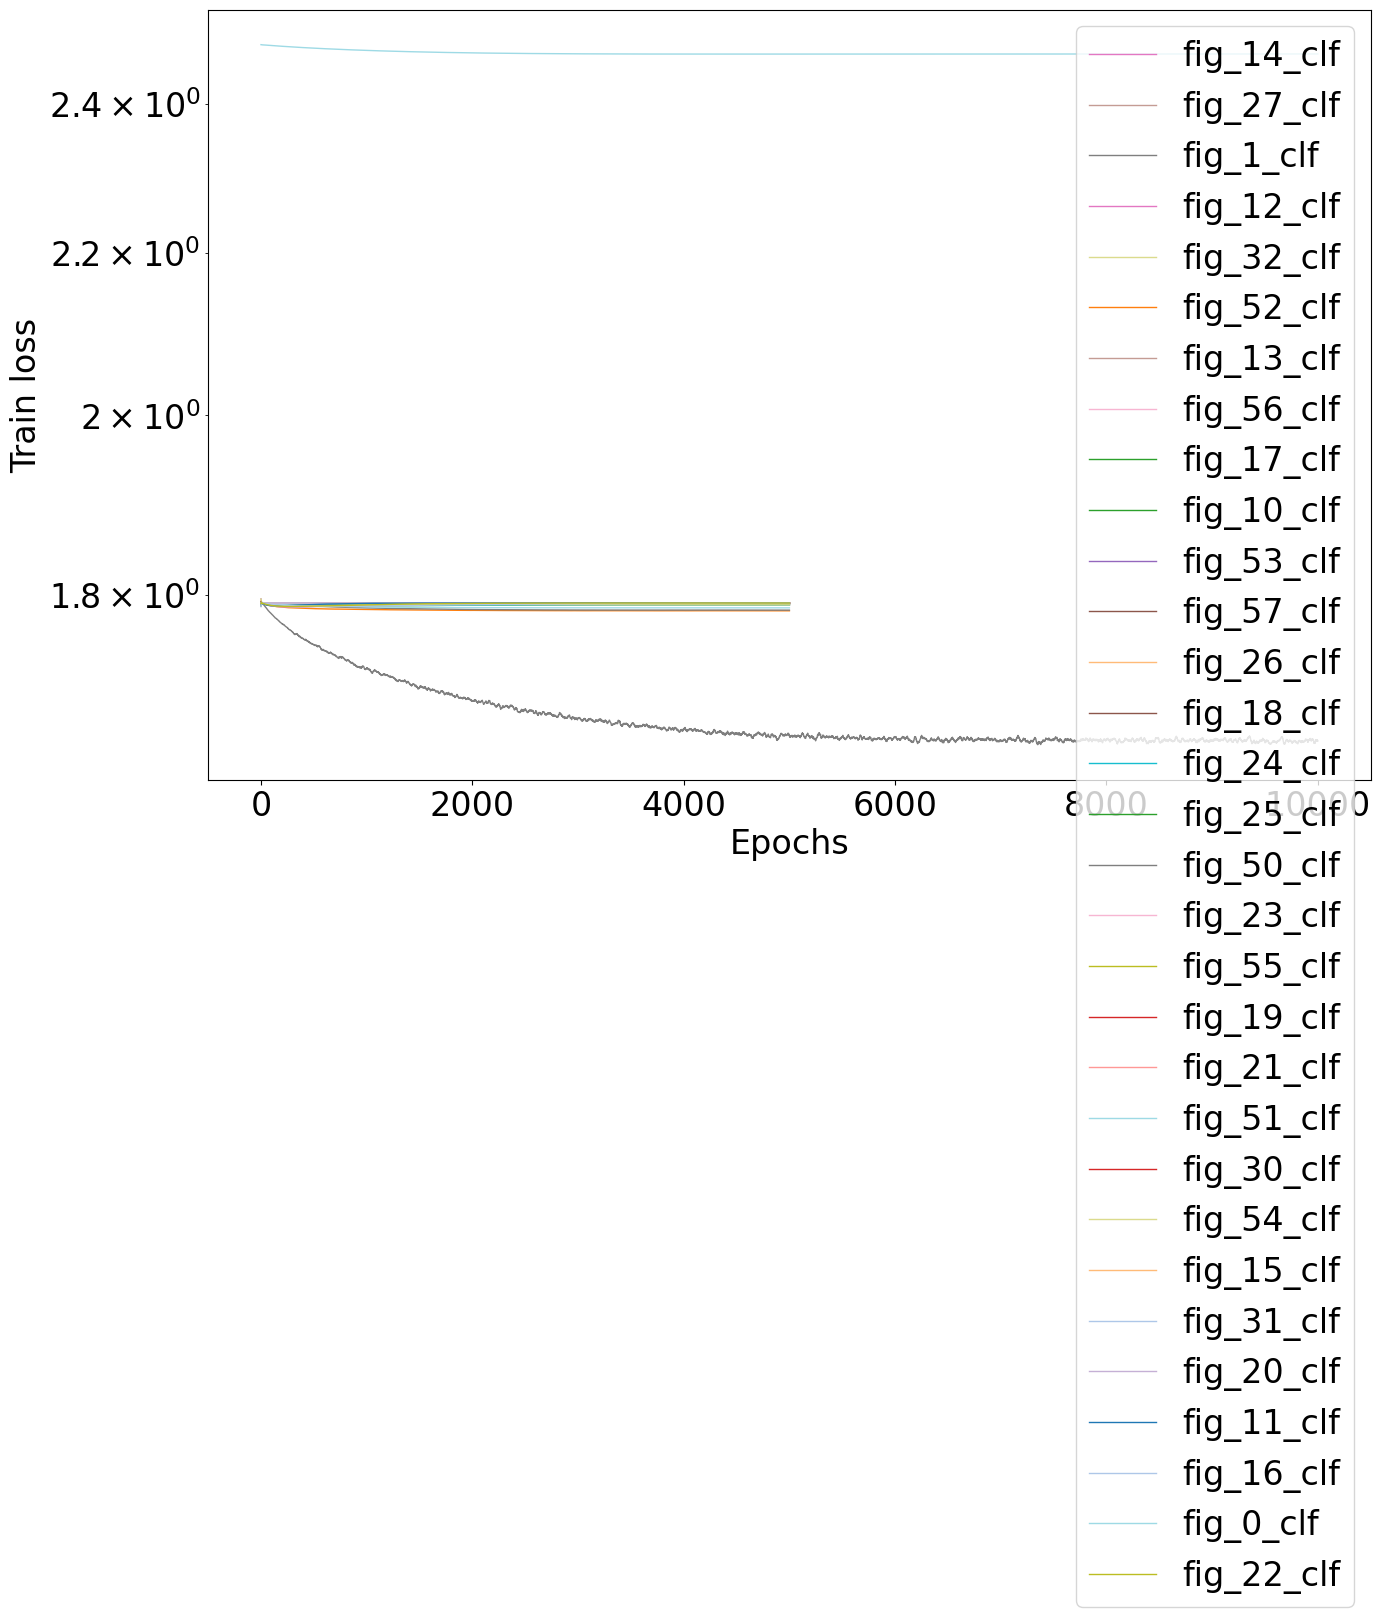

In [6]:
plot_all_train_losses(eval_runs, col_fun=col_fun)

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: xlabel='Epochs', ylabel='Test error (%)'>)

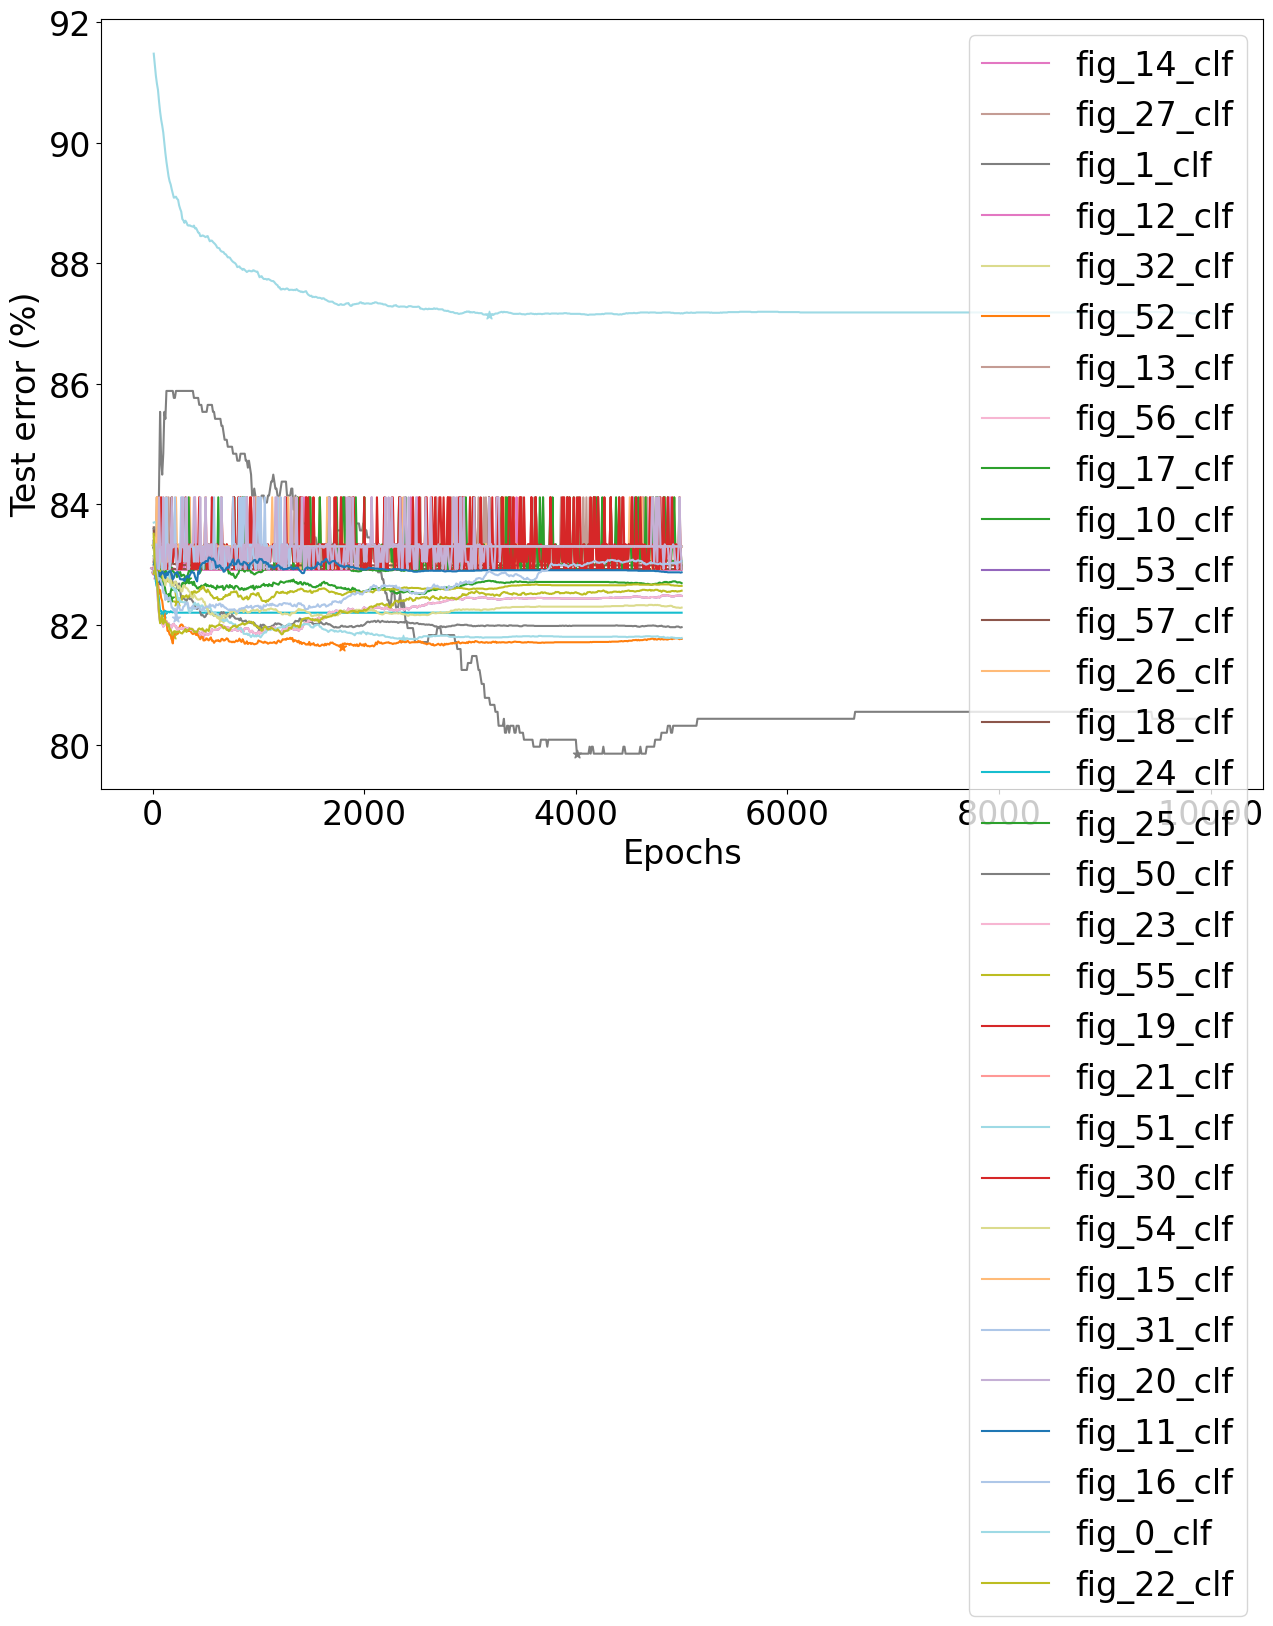

In [7]:
plot_all_test_errors(eval_runs, col_fun=col_fun)

## Analyze what are better hyperparameters

In [8]:
encoder_runs["smooth_loss"] = encoder_runs.train_loss.apply(lambda x: smoothen(x, 10))

In [9]:
def when_get_under_4(row):
    below = row.smooth_loss < 3
    return row.epochs_lst[below.argmax()] if below.any() else 5555

encoder_runs["first_under_4"] = encoder_runs.apply(when_get_under_4, axis=1)

In [10]:
encoder_runs[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr", "first_under_4", "zero_loss_threshold", "final_loss"]].sort_values("final_loss")

,m,num_layers,optim,lr,scheduler,momentum,weight_decay,width,ptr,first_under_4,zero_loss_threshold,final_loss
39,12,2,sgd,0.0100,cosineannealing,0.9,0.0005,288,3456,0.037037,0.003,0.016154
14,6,2,sgd,0.0100,cosineannealing,0.9,0.0005,72,432,0.250000,0.003,0.023555
44,6,4,sgd,0.0050,cosineannealing,0.9,0.0005,72,15552,1.336066,0.003,0.033741
41,6,4,sgd,0.0050,none,0.9,0.0005,72,15552,1.336066,0.003,0.034441
37,6,4,adam,0.0005,exponential,0.9,0.0005,72,15552,1.114754,0.003,0.034539
1,6,4,adam,0.0005,cosineannealing,0.9,0.0005,72,15552,1.114754,0.003,0.034742
42,6,4,sgd,0.0100,cosineannealing,0.9,0.0000,72,15552,1.336066,0.005,0.035208
8,6,4,sgd,0.0100,cosineannealing,0.9,0.0005,72,15552,1.336066,0.005,0.035407
33,6,4,sgd,0.0100,cosineannealing,0.9,0.0005,72,15552,1.336066,0.003,0.035407
36,6,4,sgd,0.0100,cosineannealing,0.0,0.0005,360,15552,9.450820,0.005,0.036493


In [11]:
encoder_runs.columns

Index(['Unnamed: 0', 'name', 'epochs_lst', 'train_loss', 'device', 'dtype',
       'seed_init', 'seed_net', 'seed_trainset', 'dataset', 'ptr', 'pte',
       'batch_size', 'scale_batch_size', 'background_noise', 'num_features',
       'm', 's', 'num_layers', 'num_classes', 'input_format', 'whitening',
       'auto_regression', 'net', 'random_features', 'width', 'net_layers',
       'filter_size', 'batch_norm', 'bias', 'last_lin_layer', 'loss', 'optim',
       'scheduler', 'lr', 'momentum', 'weight_decay', 'reg_type', 'epochs',
       'zero_loss_epochs', 'zero_loss_threshold', 'rescale_epochs',
       'layerwise', 'alpha', 'eval_optim', 'eval_scheduler', 'eval_lr',
       'eval_momentum', 'eval_weight_decay', 'eval_reg_type', 'eval_epochs',
       'eval_zero_loss_epochs', 'eval_zero_loss_threshold',
       'eval_rescale_epochs', 'stability', 'clustering_error', 'locality',
       'save_init_net', 'save_best_net', 'save_last_net', 'save_dynamics',
       'pickle', 'output', 'final_loss', 

In [12]:
stuck = encoder_runs[encoder_runs.first_under_4 > 5000]
stuck[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr"]]#.apply(lambda x: x.unique(), axis=0)

,m,num_layers,optim,lr,scheduler,momentum,weight_decay,width,ptr
10,6,4,sgd,0.010,cosineannealing,0.9,0.0005,360,15552
13,6,4,sgd,0.010,cosineannealing,0.9,0.0000,360,15552
24,6,4,adam,0.010,none,0.9,0.0005,72,15552
26,6,4,adam,0.005,none,0.9,0.0005,72,15552
28,6,4,sgd,0.010,exponential,0.9,0.0000,360,15552
31,6,4,adam,0.020,none,0.9,0.0005,72,15552


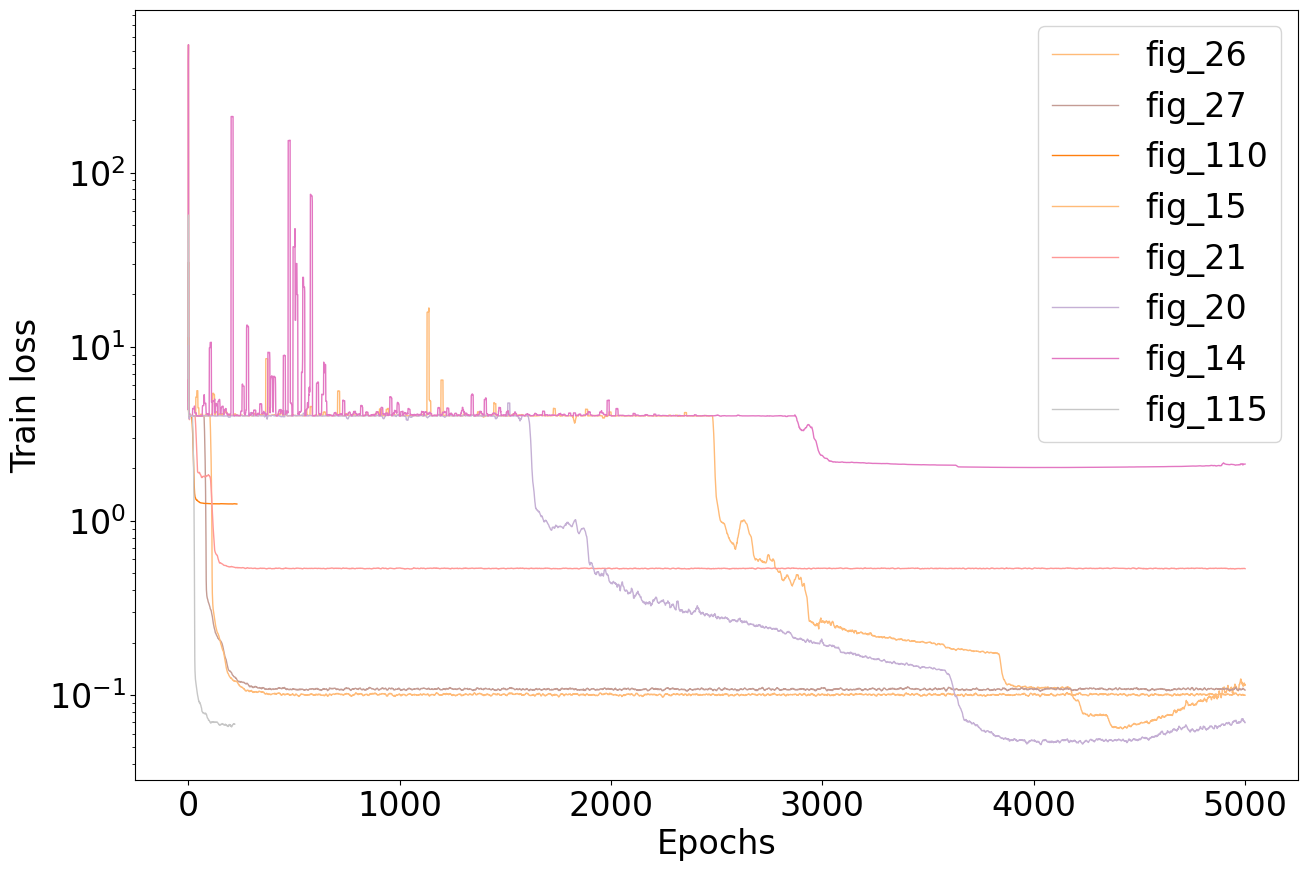

In [13]:
lates = encoder_runs[(encoder_runs.first_under_4 >= 20) & (encoder_runs.first_under_4 < 5000)]
f, a = plot_all_train_losses(lates, col_fun=setup_colors(lates), smooth=10)
# a.set_xlim(-1, 200)

In [14]:
lates[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr"]]

,m,num_layers,optim,lr,scheduler,momentum,weight_decay,width,ptr
3,6,4,adam,0.010,cosineannealing,0.9,0.0005,72,15552
11,6,4,adam,0.010,exponential,0.9,0.0005,72,15552
22,6,4,sgd,0.010,exponential,0.9,0.0000,144,15552
23,6,4,adam,0.020,exponential,0.9,0.0005,72,15552
27,6,4,adam,0.005,exponential,0.9,0.0005,72,15552
29,6,4,adam,0.005,cosineannealing,0.9,0.0005,72,15552
32,6,4,adam,0.020,cosineannealing,0.9,0.0005,72,15552
35,6,4,sgd,0.004,exponential,0.9,0.0000,360,15552


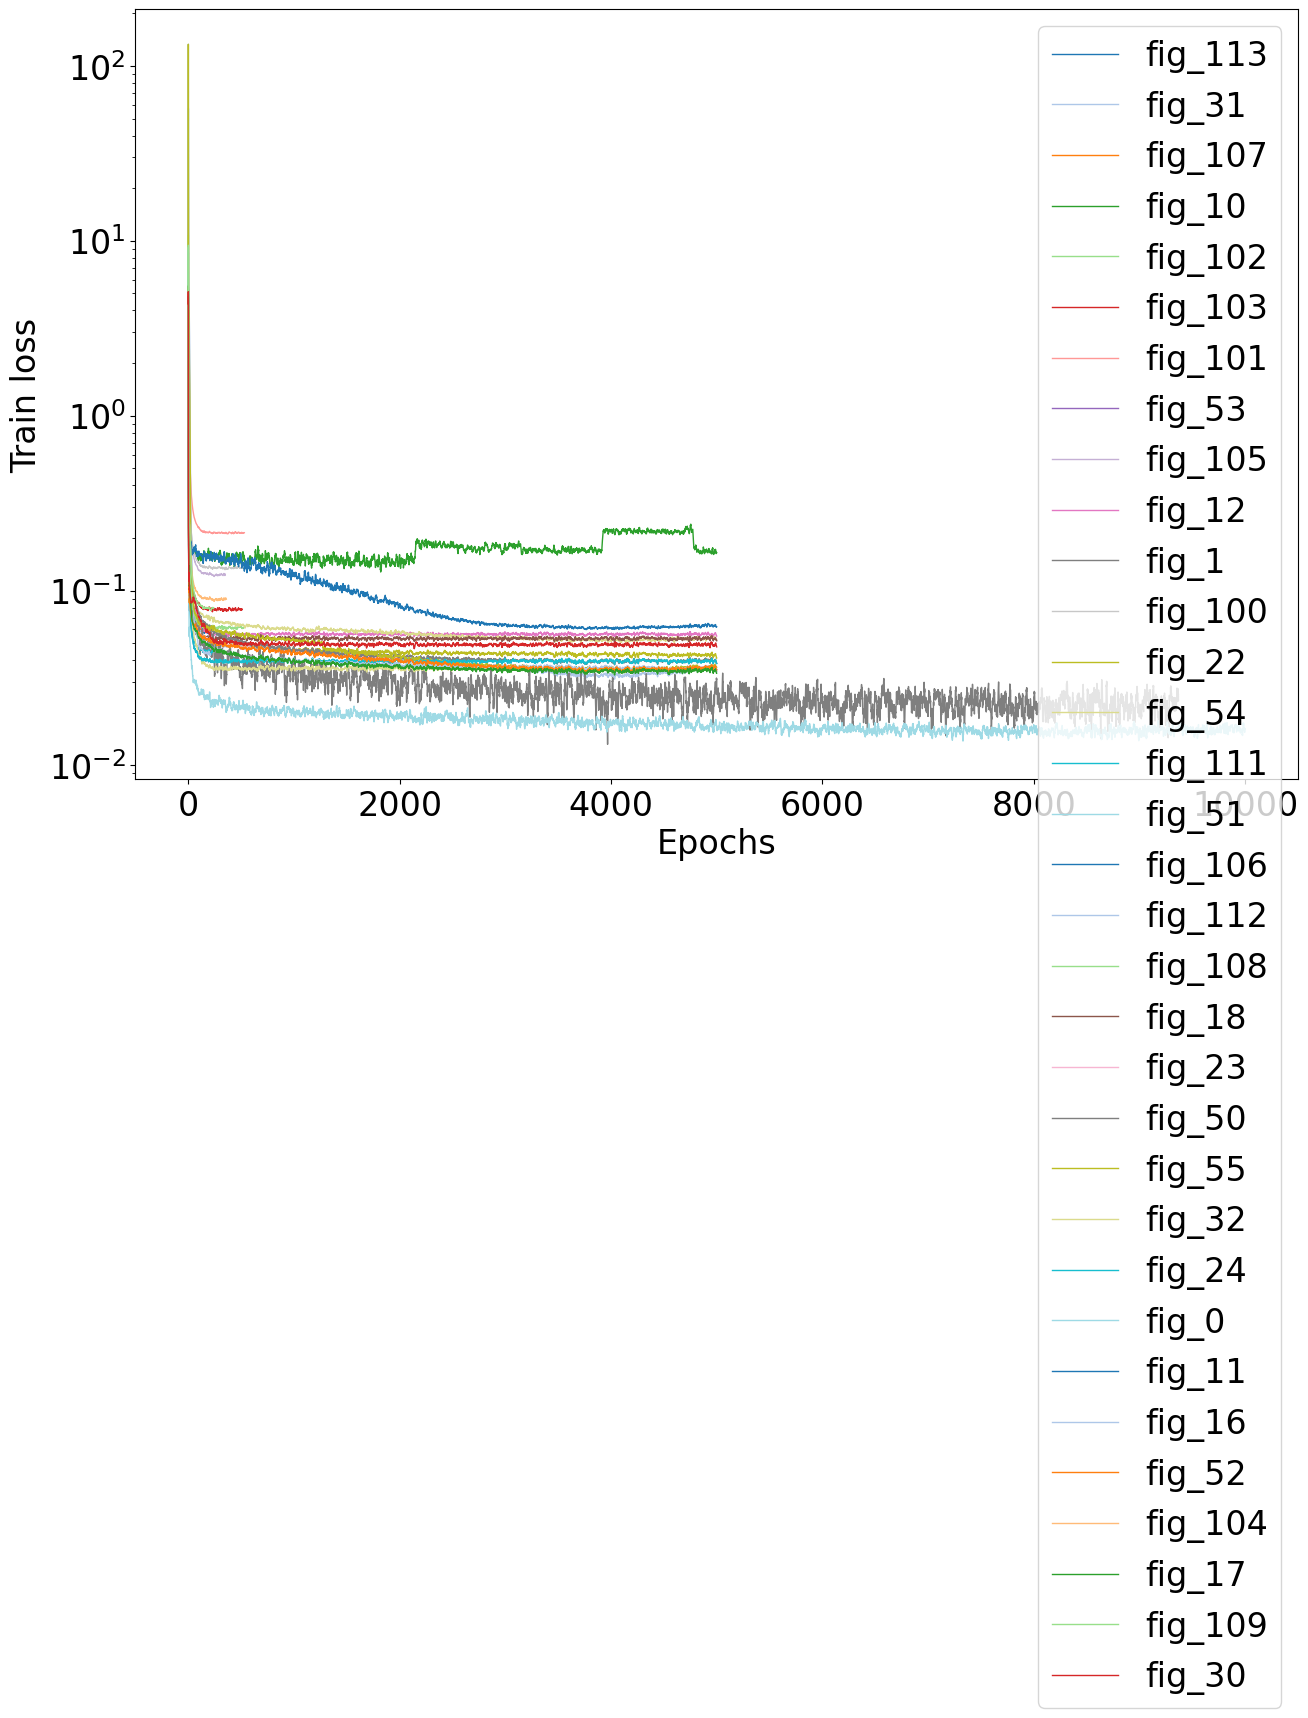

In [15]:
earlies = encoder_runs[encoder_runs.first_under_4 < 20]
f, a = plot_all_train_losses(earlies, col_fun=setup_colors(earlies), smooth=10)
# a.set_xlim(-1, 200)

In [16]:
earlies[["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", "width", "ptr"]]

,m,num_layers,optim,lr,scheduler,momentum,weight_decay,width,ptr
0,6,4,sgd,0.0040,exponential,0.0,0.0000,360,15552
1,6,4,adam,0.0005,cosineannealing,0.9,0.0005,72,15552
2,6,4,sgd,0.0040,exponential,0.9,0.0000,72,15552
4,6,4,sgd,0.0200,none,0.9,0.0005,72,15552
5,6,4,sgd,0.0100,exponential,0.9,0.0000,36,15552
6,6,4,sgd,0.0040,exponential,0.9,0.0000,36,15552
7,6,4,sgd,0.0040,exponential,0.0,0.0000,36,15552
8,6,4,sgd,0.0100,cosineannealing,0.9,0.0005,72,15552
9,6,4,sgd,0.0040,exponential,0.0,0.0000,72,15552
12,6,4,sgd,0.0200,exponential,0.9,0.0005,72,15552


In [17]:
earlies[earlies.optim=="sgd"].lr.unique()

array([0.004, 0.02 , 0.01 , 0.005])

In [18]:
encoder_runs[encoder_runs.optim=="sgd"].lr.unique()

array([0.004, 0.02 , 0.01 , 0.005])

In [19]:
def plot_single_param_effect(param, df, other_params=None, scale=None):
    print(param)
    fig, ax = plt.subplots(figsize=(10,8))
    try:
        ax.scatter(df[param], df.first_under_4, color="gray")
        done = None
    except:
        done = []
        vals = []
        for x in df[param]:
            if x not in done:
                done.append(x)
            vals.append(done.index(x))
        ax.scatter(vals, df.first_under_4, color="gray")
        ax.set_xticks(list(range(len(done))))
        ax.set_xticklabels(done)
        print(done, vals)
    ax.set_xlabel(param)
    ax.set_ylabel("first_under_4")

    if other_params is None:
        return
    # Now, try to draw a link between those that have only that param different
    if param in other_params:
        other_params = [x for x in other_params if x !=param]
    dfp = df[other_params]
    # could be optimized:
    for i, row1 in dfp.iterrows():
        for j, row2 in dfp.iterrows():
            if i<j and row1.equals(row2):
                vals = [df.loc[i][param], df.loc[j][param]]
                if done is not None:
                    vals = [done.index(x) for x in vals]
                if scale=='log':
                    vals = [x if x != 0 else 3.5e-4 for x in vals ]
                ax.plot(vals, [df.loc[i].first_under_4, df.loc[j].first_under_4], color='k', alpha=0.1)
    # ax.set_xscale('log')


def plot_each_param_effect(params, df, **kwargs):
    for param in params:
        plot_single_param_effect(param, df, params, **kwargs)

In [20]:
encoder_runs["relative_width"] = encoder_runs.apply(lambda x: x.width / (x.num_features**2), axis=1)

m
num_layers
optim
lr
scheduler
momentum
weight_decay
relative_width
ptr


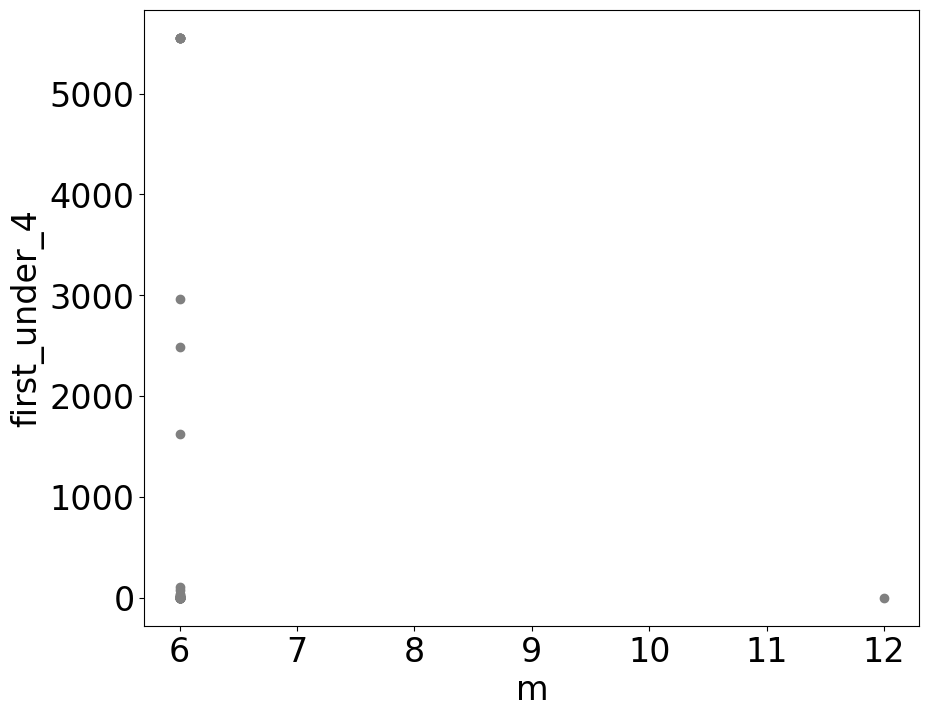

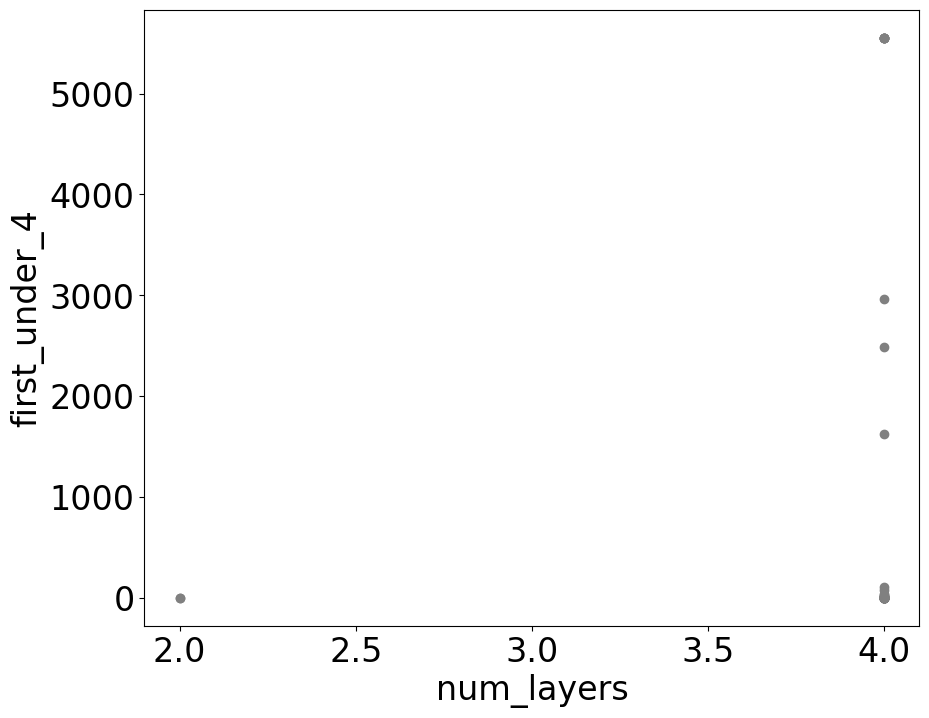

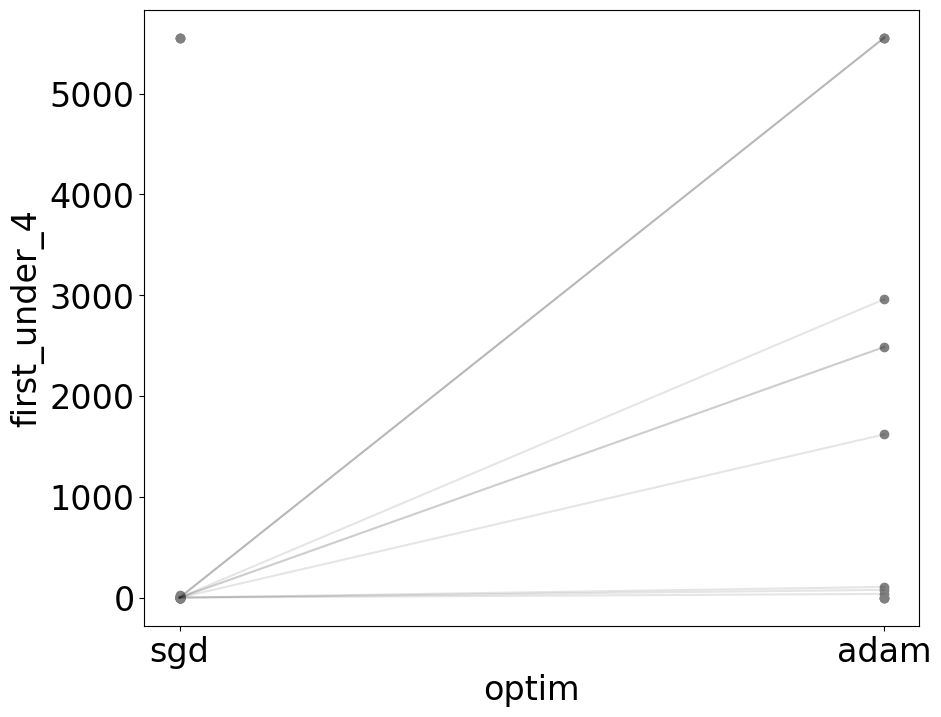

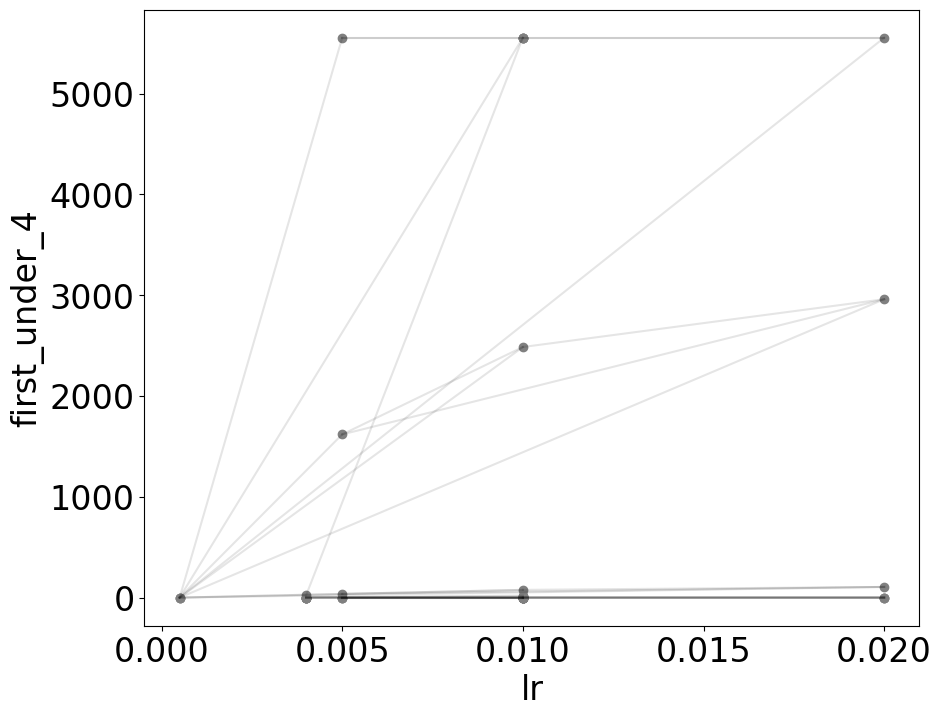

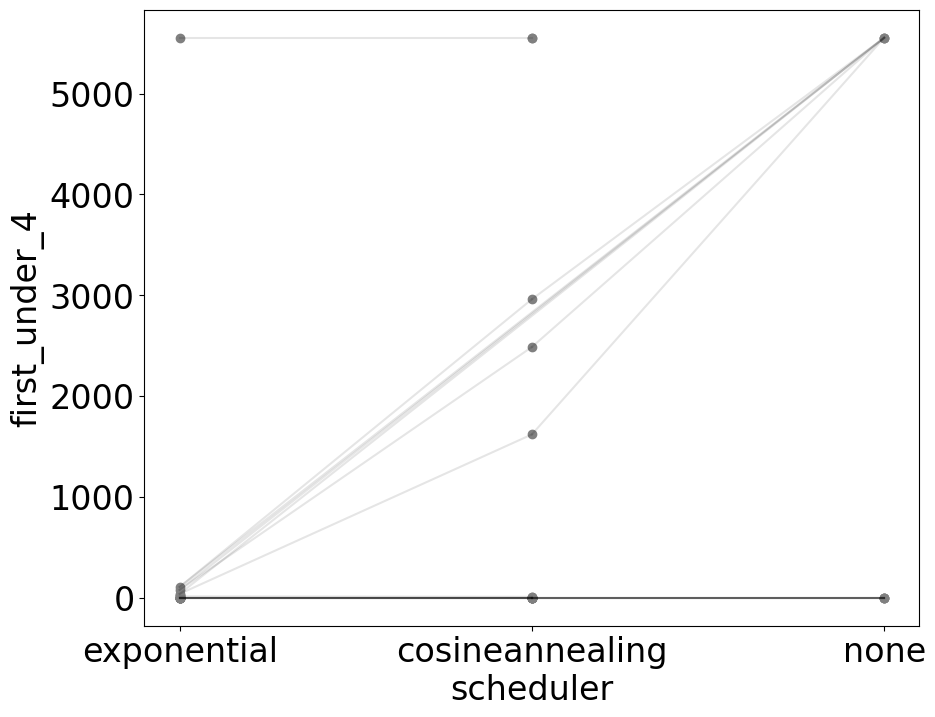

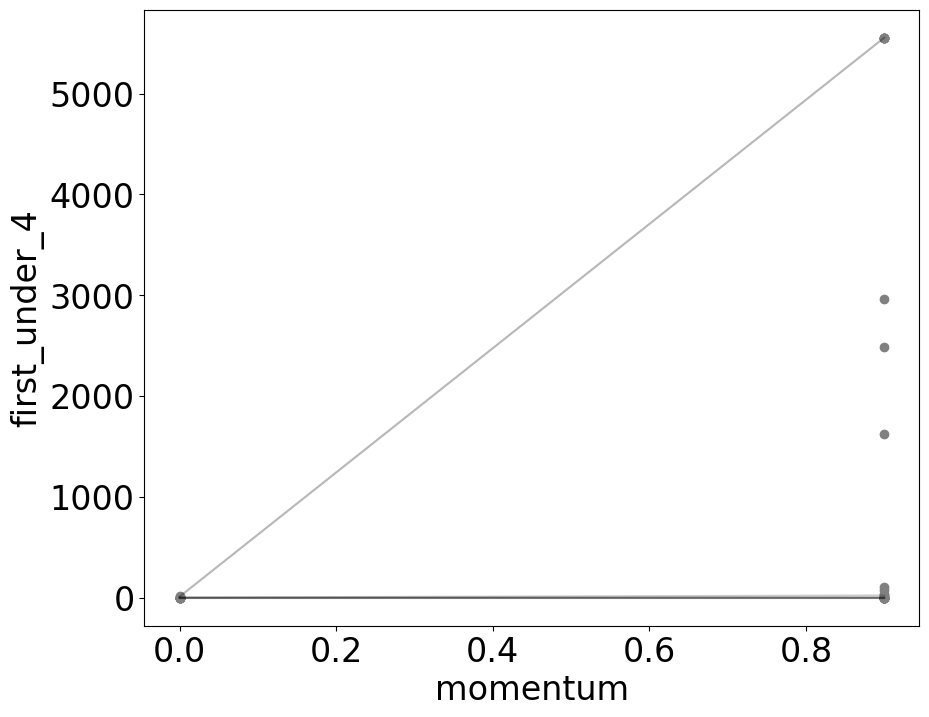

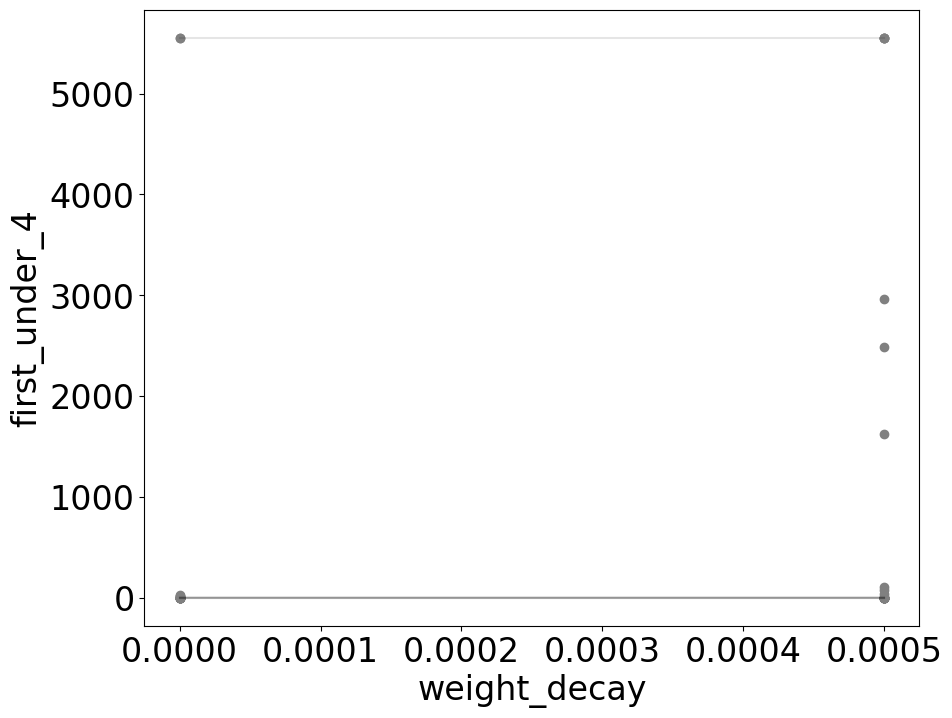

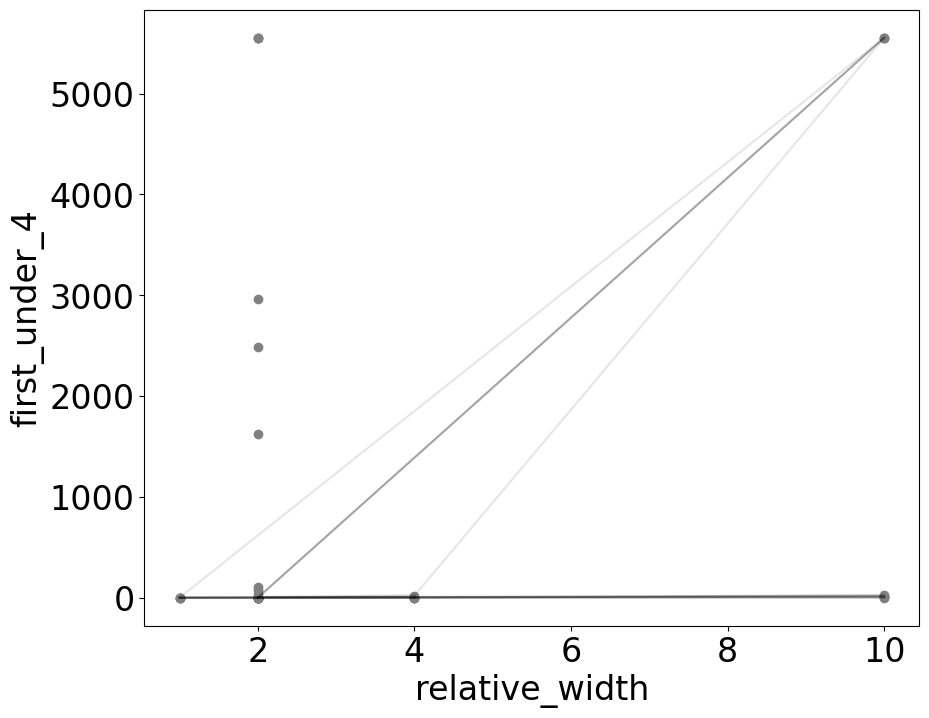

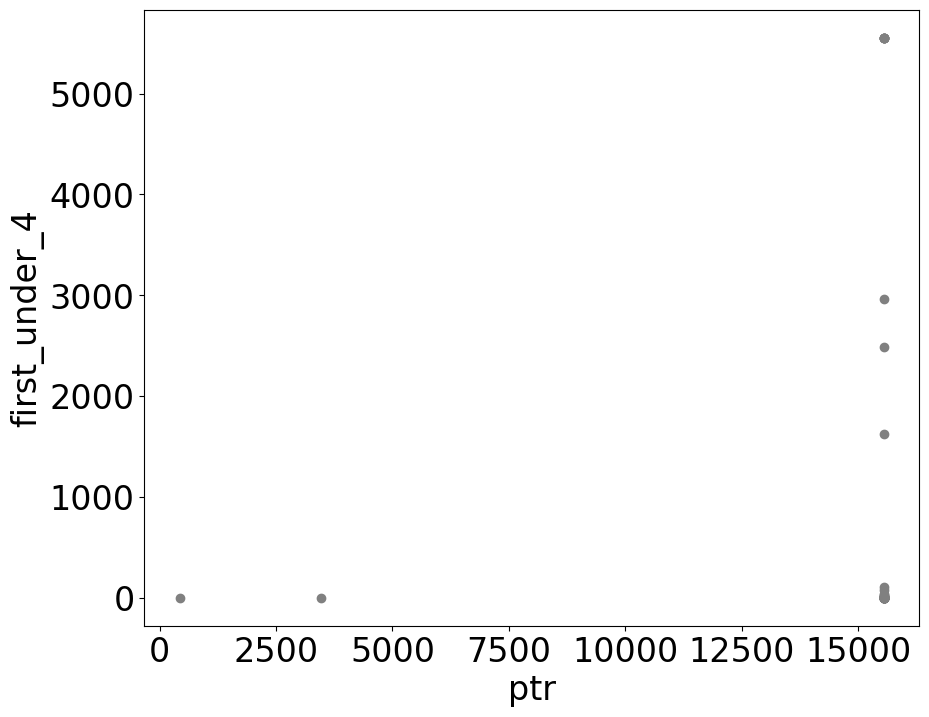

In [21]:
plot_each_param_effect(["m", "num_layers", "optim", "lr","scheduler", "momentum", "weight_decay", #"width",
 "relative_width", "ptr"], encoder_runs, scale=None)